# About Perceptron and ADALINE(Adaptive Linear Neuron)
## Perceptron
シンプルな機械学習アルゴリズムとしてPerceptronがある。
簡単にいうと、特徴行列$x$が入力として与えられたとき、重みベクトル$w$とのドット積によって得られる$z$に対して、ステップ関数$\phi(z)$を出力ととることができる。
$$\boldsymbol{w}=\begin{bmatrix} w_1 \\ \vdots \\ w_m \end{bmatrix}, \boldsymbol{x}=\begin{bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix}$$

活性化関数$\phi(z)$は単純なステップ関数として
$$\phi(z)=\begin{eqnarray}\begin{cases}1 & (z \geqq \theta)\\-1 & (z \lt \theta)\end{cases}\end{eqnarray}$$
と定義できる。ここで$z$は$\boldsymbol{w}$と$\boldsymbol{x}$のドット積であることから
$$z=\boldsymbol{w^{\mathrm{T}}x}$$
を計算しステップ関数$\phi(z)$に入力させる。
活性関数の誤差から重みの更新を行い、学習させる。
つまり、学習率を$\eta$と置いたとき
$$\Delta w_j = \eta( y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$$
を計算し、更新される重みベクトルは
$$w_j := w_j + \Delta w_j$$
となる

In [1]:
import numpy as np

class Perceptron(object):
  """Perceptron classifier.

  Parameters
  ------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset.

  Attributes
  ------------
  w_ : 1d-array
    Weights after fitting.
  errors_ : list
    Number of misclassifications in every epoch.
  """
  def __init__(self, eta=0.01, n_iter=50, random_seed=1): # Added random_seed=1 for better estimation
    self.eta = eta
    self.n_iter = n_iter
    self.random_seed = random_seed #add this line to generate random number
    
  def fit(self, X, y):
    """Fit training data.
    Parameters
    ----------
    X : {array-like}, shape = [n_samples, n_features]
      Training vectors, where n_samples is the number of samples and
      n_features is the number of features.
    y : array-like, shape = [n_samples]
      Target values.

    Returns
    -------
    self : object
    """
    # self.w_ = np.zeros(1 + X.shape[1]) ## Commented out for random number
    rgen = np.random.RandomState(self.random_seed) # Added this line for random number
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter): # Iterate training data with trainig times
      errors = 0
      for xi, target in zip(X,y): # Update weight based on each samples
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update *xi
        # update weight w0: dwo = n(yi - yi)
        self.w_[0] += update
        # if weight update is not 0 then categorise as errors
        errors += int(update != 0.0)
      # Store error for each iteration
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Claculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


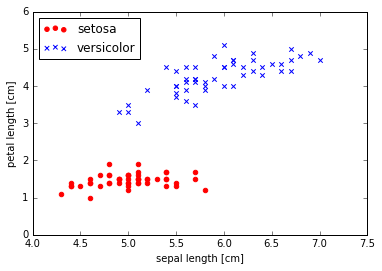

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# Extract 1 - 100 lines for target var
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

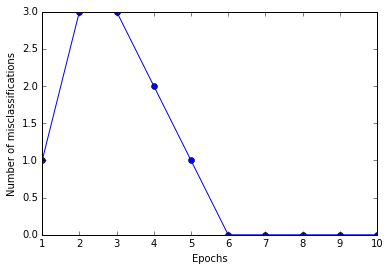

In [4]:
%matplotlib inline
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [5]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

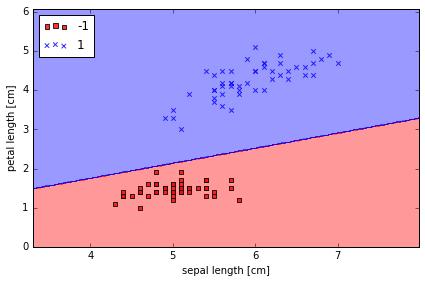

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

In [7]:
class AdalineGD(object):
  """Adaptive Linear Neuron分類器
  パラメータ
  ----------
  eta : float
    学習率 (0.0 < eta <= 1.0)
  n_iter : int
    トレーニングデータのトレーニング回数
  属性
  ----------
  w_ : １次元配列
    適合後の重み
  errors_ : リスト
    各エポックでの誤分類数
  """
  def __init__(self, eta=0.01, n_iter = 50):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    """ トレーニングデータに適合させる
    パラメータ
    ----------
    X：（配列のようなデータ構造）, shape = [n_samples, n_features]
      トレーニングデータ
      n_sampleはサンプルの個数、n_featureは特徴量の個数
    y: 配列のようなデータ構造, shape = [n_samples]
      目的変数
    戻り値
    ----------
    self : object
    """
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
      # 活性化関数の出力の計算
      output = self.net_input(X)
      # 誤差の計算
      errors = (y-output)
      # 重みの更新
      self.w_[1:] += self.eta * X.T.dot(errors)
      # w0の更新
      self.w_[0] += self.eta * errors.sum()
      # コスト関数の計算
      cost = (errors ** 2).sum() / 2.0
      # コストの格納
      self.cost_.append(cost)
    return self
  def net_input(self, X):
    """総入力の計算"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """線形活性化関数の出力を計算"""
    return self.net_input(X)

  def predict(self, X):
    """1ステップ後のクラスラベルを返す"""
    return np.where(self.activation(X) >= 0.0, 1, -1)

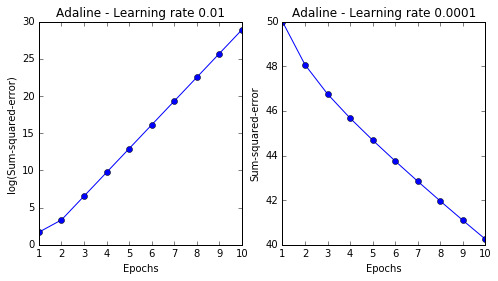

In [8]:
fix, ax = plt.subplots(nrows=1, ncols = 2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [9]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

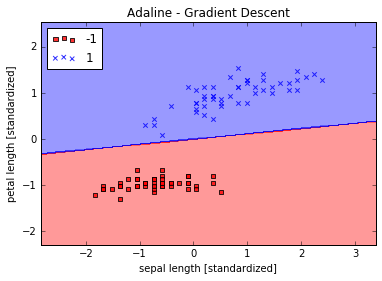

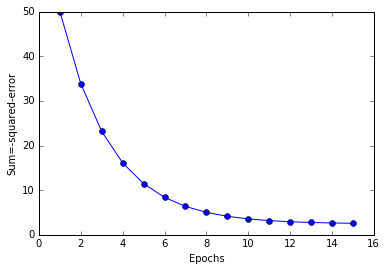

In [10]:
# 勾配降下法によるADALINEの学習（標準化後、学習率eta=0.01)
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの適合
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum=-squared-error')
plt.show()

In [11]:
from numpy.random import seed
class AdalineSGD(object):
    """Adaptive Linear Neuron分類器
    パラメータ
    ----------
    eta : float
        学習率(0.0 < eta <= 1.0)
    n_iter : int
        トレーニングデータのトレーニング回数
    属性
    ----------
    w_ : １次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
    shuffle : bool (Default: True)
        循環を回避するために各エポックでトレーニングデータをシャッフル
    random_state : int (Default: None)
        シャッフルに使用するrandome_stateを設定し、重みを初期化
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 重みの初期化フラグはFalseに設定
        self.w_initialized = False
        # 各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        # 引数random_stateが指定された場合は乱数種を設定
        if random_state:
            seed(random_state)
    
    def fit(self, X,y):
        """　トレーニングデータに適合させる
        パラメータ
        -----------
        X : (配列のようなデータ構造), shape = [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数, n_featureは特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的変数
        戻り値
        ----------
        self : object
        """
        # 重みベクトルの作成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの作成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X,y)
            # 各サンプルのコストを格納するリストの作成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            #　平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            # 目的変数yの要素数が2以上の場合は
            # 各サンプルの特徴量xiと目的変数targetで重みを更新
            if y.ravel().shape[0] > 1:
                for xi, target in zip(X, y):
                    self._update_weights(xi, target)
            # 目的変数yの要素数が1の場合は
            # サンプル全体の特徴量Xと目的変数yで重みを更新
            else:
                self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r=np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを0に初期化"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        # 活性化関数の出力の計算
        output = self.net_input(xi)
        # 誤差の計算
        error = (target - output)
        # 重みをw1, ...., wmの更新
        self.w_[1:] += self.eta * xi.dot(error)
        # 重みw0の更新
        self.w_[0] += self.eta * error
        # コストの計算
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

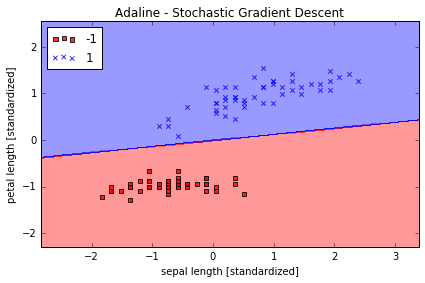

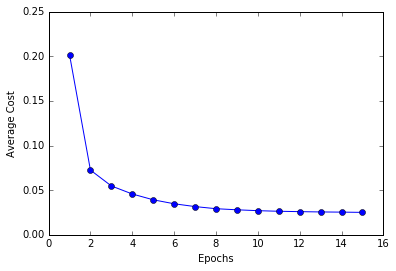

In [12]:
# 確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# モデルへの適合
ada.fit(X_std, y)
#境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定(左上に配置)
plt.legend(loc='upper left')
plt.tight_layout()
# プロットの表示
plt.show()
# エポックとこすとの折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
# プロットの表示
plt.show()